<a href="https://colab.research.google.com/github/hemavathyravi/data-science/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hemavathyravi","key":"d1188165f3db1d41deb7fd44f3a1b257"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                      title                                     size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  ---------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide     Covid Cases and Deaths WorldWide           8KB  2023-02-01 12:22:51          13162        447  1.0              
datascientistanna/customers-dataset                      Shop Customer Data                        23KB  2023-02-07 18:42:21          11371        260  1.0              
ulrikthygepedersen/co2-emissions-by-country              CO2 Emissions                            114KB  2023-02-28 12:39:49           1285         33  1.0              
amaanansari09/most-streamed-songs-all-time               Most Streamed Songs (All Time)             8KB  2023-03-08 10:56:24           1611         48

In [ ]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 7.97MB/s]


In [ ]:
!unzip pima-indians-diabetes-database.zip

Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
#Libraries for ML
from sklearn.preprocessing import StandardScaler #Standardizasyon için
from sklearn.model_selection import train_test_split, GridSearchCV #GridSearchCV: KNN ile ilgili en iyi parametreleri belirlemek
from sklearn.metrics import accuracy_score ,confusion_matrix #Sonuç değerlendirme
from sklearn.neighbors import KNeighborsClassifier,LocalOutlierFactor #Trainin algoritması ve NCA ve Outlier değerler için
from sklearn.decomposition import PCA #PCA için

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# plotly


In [ ]:
data = pd.read_csv("/content/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import itertools
plt.style.use('fivethirtyeight')
import seaborn as sns
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


In [ ]:
p = data[data.Outcome == 1]
n = data[data.Outcome == 0]

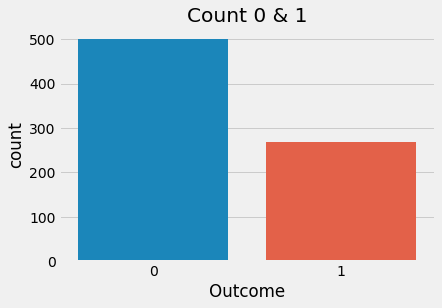

In [ ]:
sns.countplot(x='Outcome',data=data)
plt.title("Count 0 & 1")
plt.show()

In [ ]:
print('Data Shape',data.shape)
print(data.info()) 
describe = data.describe()
describe.T

Data Shape (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


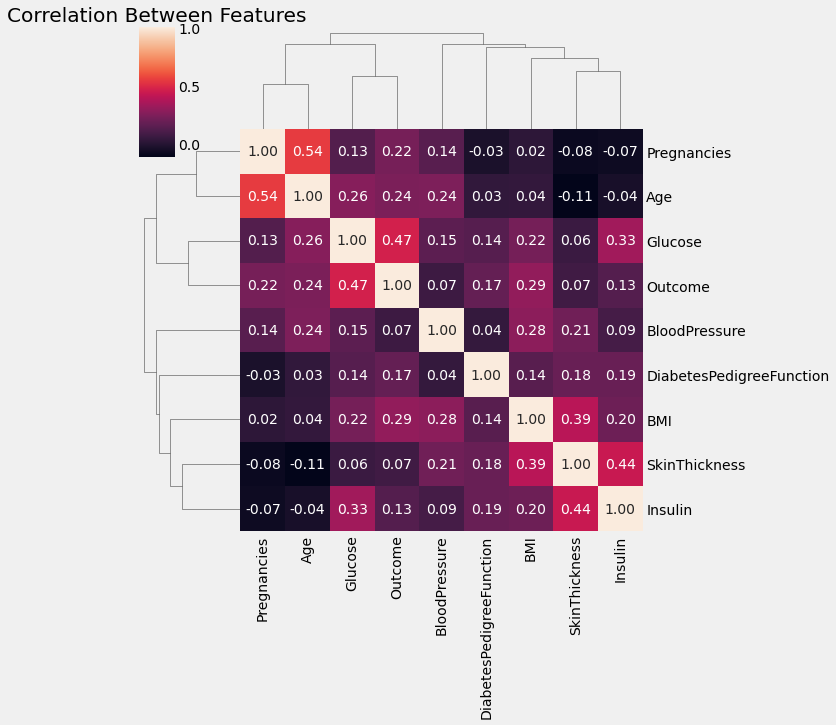

In [ ]:
corr_data = data.corr() 
sns.clustermap(corr_data,annot= True,fmt = '.2f')
plt.title('Correlation Between Features')
plt.show();

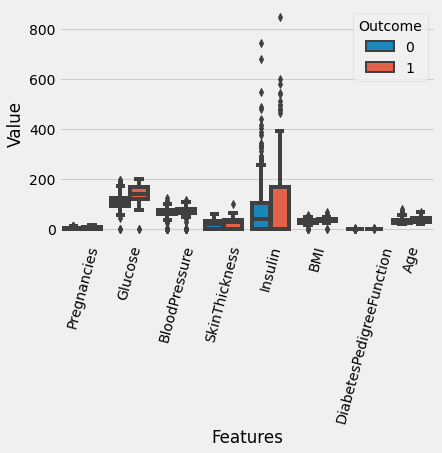

In [ ]:
data_melted = pd.melt(data,id_vars='Outcome',
                      var_name='Features',
                      value_name='Value')

plt.figure()
sns.boxplot(x='Features',y='Value',hue='Outcome',data=data_melted) #Featureslar target'a göre ayrıldı.
plt.xticks(rotation=75) #Feature isimleri 90 derece dik görülecek.
plt.show()

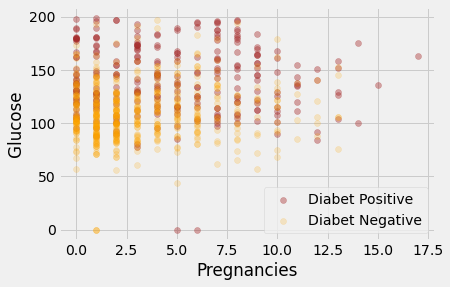

In [ ]:
plt.scatter(p.Pregnancies,p.Glucose,color = "brown",label="Diabet Positive",alpha=0.4)
plt.scatter(n.Pregnancies,n.Glucose,color = "Orange",label="Diabet Negative",alpha=0.2)
plt.xlabel("Pregnancies")
plt.ylabel("Glucose")
plt.legend()
plt.show()

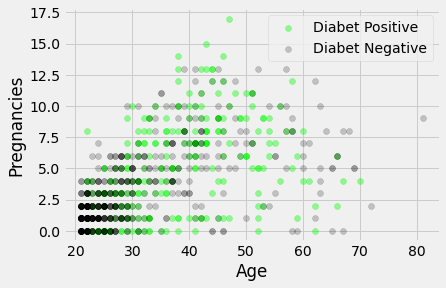

In [ ]:
plt.scatter(p.Age,p.Pregnancies,color = "lime",label="Diabet Positive",alpha=0.4)
plt.scatter(n.Age,n.Pregnancies,color = "black",label="Diabet Negative",alpha=0.2)
plt.xlabel("Age")
plt.ylabel("Pregnancies")
plt.legend()
plt.show()

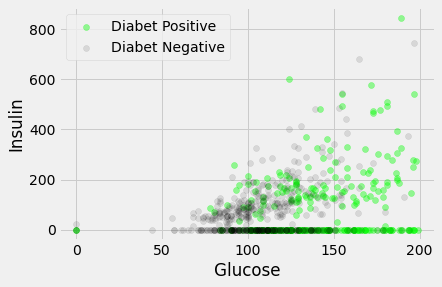

In [ ]:
plt.scatter(p.Glucose,p.Insulin,color = "lime",label="Diabet Positive",alpha=0.4)
plt.scatter(n.Glucose,n.Insulin,color = "black",label="Diabet Negative",alpha=0.1)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.legend()
plt.show()

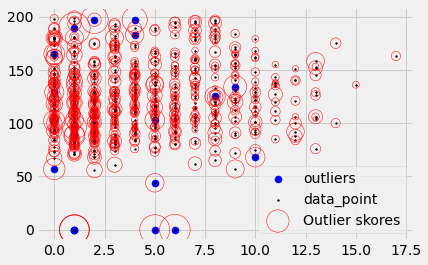

In [ ]:
x = data.drop(['Outcome'],axis=1) 
y = data.Outcome
columns = x.columns.tolist() # Featureların isimlerini bir listede topladık.

clf = LocalOutlierFactor() #KNN değeri gerekiyor. Tanımlı değeri 20 ve bizde 20 kullanacağız. O nedenle birşey yazmayacağız.
y_pred = clf.fit_predict(x) #LOF uygulayıo negetif outlier f. alıyoruz.

x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score['score'] = x_score

threshold_outliers = -1.5
filtre = outlier_score['score'] < threshold_outliers
outlier_index = outlier_score[filtre].index.tolist() #outlier değerlerine threshold uygulanmış olanları bir listeye attık

plt.figure()
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1],color = 'blue',s=50,label='outliers')
plt.scatter(x.iloc[:,0]
            ,x.iloc[:,1],color='k',s=3,label='data_point') #s : boyut

radius = (x_score.max() - x_score ) / (x_score.max() - x_score.min() ) #Değerleri normalize ederek biası önledik
outlier_score['radius '] = radius

plt.scatter(x.iloc[:,0], x.iloc[:,1], s=1000*radius, edgecolors='r',facecolor='none',label='Outlier skores')
plt.legend()
plt.show();

In [ ]:
x = x.drop(outlier_index) #outliers remove
y = y.drop(outlier_index).values #outliers remove

In [ ]:
test_size = 0.2

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size,random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) #scaler isimli bir değişkene Standartscaler metodunu atayıp sonra bu değişken aracılığıyla xtraindeki verileri standardize ettik

x_test = scaler.transform(x_test)

x_train_df = pd.DataFrame(x_train,columns=columns)
x_train_df_describe = x_train_df.describe()
x_train_df['target'] = y_train

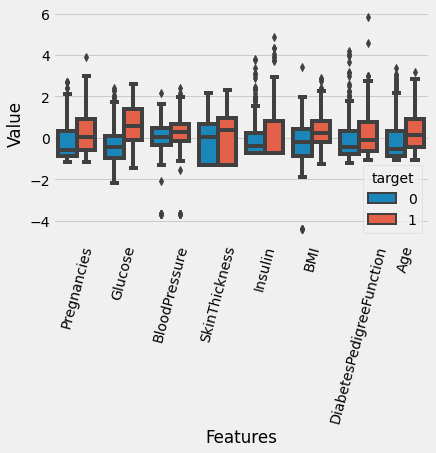

In [ ]:
data_melted = pd.melt(x_train_df,id_vars='target',
                      var_name='Features',
                      value_name='Value')

plt.figure()
sns.boxplot(x='Features',y='Value',hue='target',data=data_melted) #Featureslar target'a göre ayrıldı.
plt.xticks(rotation=75) #Feature isimleri 90 derece dik görülecek.
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = LR, X= x_train, y=y_train, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7502542372881356
Standart Deviation Accuracies:  0.04536417977366145


In [ ]:
LR.fit(x_train,y_train)
print("Test Accuracy {}".format(LR.score(x_test,y_test))) 

LRscore = LR.score(x_test,y_test)

Test Accuracy 0.86


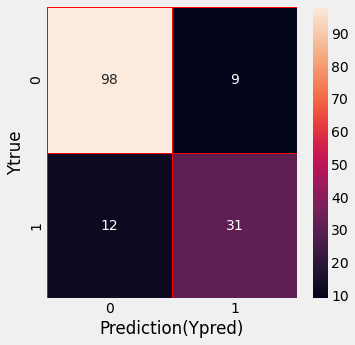

In [ ]:
yprediciton1= LR.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton1)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [ ]:
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = NB, X= x_train, y=y_train, cv=35)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7342670401493933
Standart Deviation Accuracies:  0.11802970097658376


In [ ]:
NB.fit(x_train,y_train) #learning
#prediction
print("Accuracy of NB Score: ", NB.score(x_test,y_test))

NBscore= NB.score(x_test,y_test)

Accuracy of NB Score:  0.84


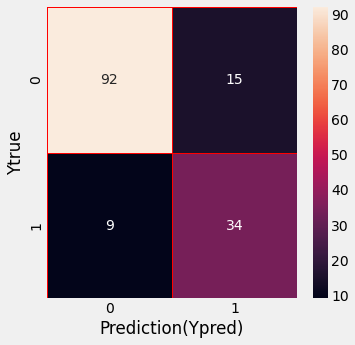

In [ ]:
yprediciton4= NB.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton4)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()